In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
train=pd.read_csv('/Users/rashm/Desktop/training/titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 individuals on board the Titanic with an average survival rate of 38%. 
Ages range from 0.42 to 80 years old,and the average age is approximately 30 years old.
At least 75% of them do not have their parents or children on board.At least 50% of the passengers did not have any siblings or spouses accompanying them, while at least 75% did not have any parents or children on board. The fare varied greatly.

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.8+ KB


<h2> Checking for NULL values</h2>

<Axes: >

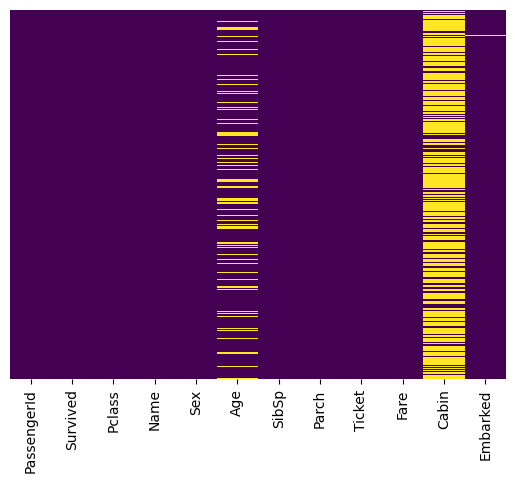

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Inference 
As we can see from the graph ,Age and Cabin have got the null values while cabin has huge amount of null values 
and age has moderate amount of null values.
Therefore,we drop the cabin column as it has most null values.

<h3>Filling Null Values<h3>

In [9]:
print('Embarkation per ports \n{}'.format(train['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
train['Embarked'].fillna(value='S', inplace=True)
train['Fare'].fillna(value='F', inplace=True)



In [13]:
print('Embarkation per ports after filling \n{}'.format(train['Embarked'].value_counts()))

Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
print('Fare \n{}'.format(train['Fare'].value_counts()))

Fare 
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [ ]:
train['Cabin'].fillna(value='S', inplace=True)

In [9]:
train.drop('Cabin',axis=1,inplace=True)

<h2> Graphical Analysis </h2>

<Axes: xlabel='Survived', ylabel='count'>

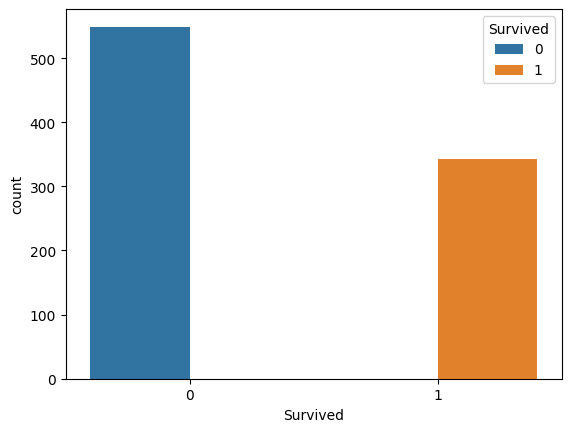

In [48]:
sns.countplot(x ="Survived", hue ="Survived",data = train)

<Axes: xlabel='Pclass', ylabel='count'>

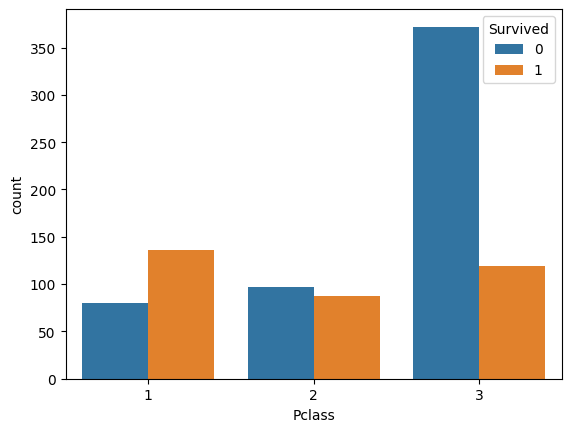

In [43]:
sns.countplot(x ="Pclass", hue ="Survived",data = train)

<Axes: xlabel='SibSp', ylabel='count'>

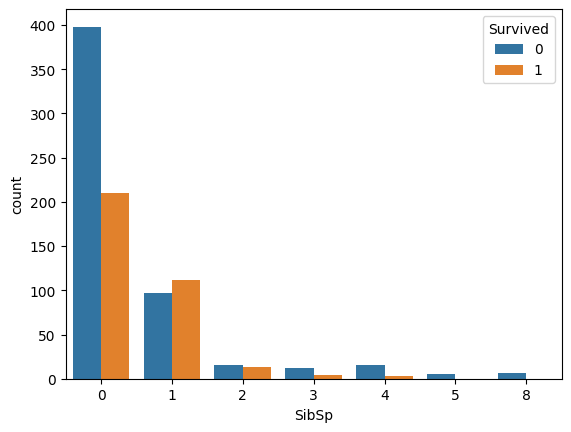

In [44]:
sns.countplot(x ="SibSp", hue ="Survived",data = train)

<Axes: xlabel='Parch', ylabel='count'>

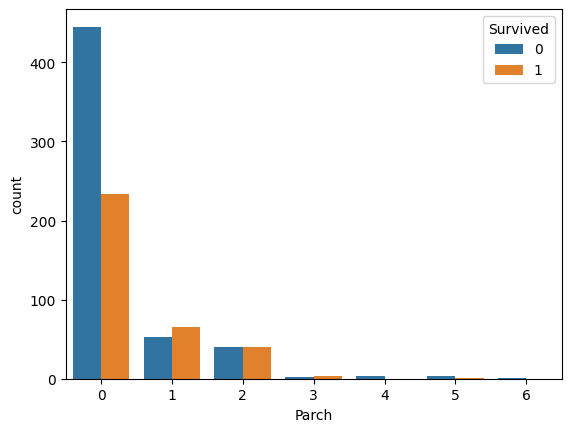

In [45]:
sns.countplot(x ="Parch", hue ="Survived",data = train)

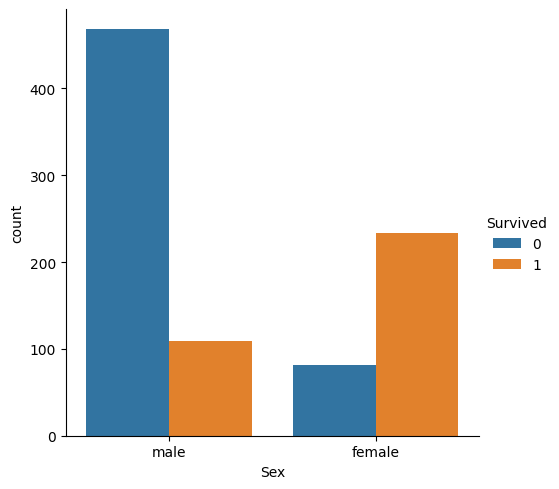

In [39]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

<h3>##Numerical Attributes<h3>

<Axes: xlabel='Age', ylabel='Count'>

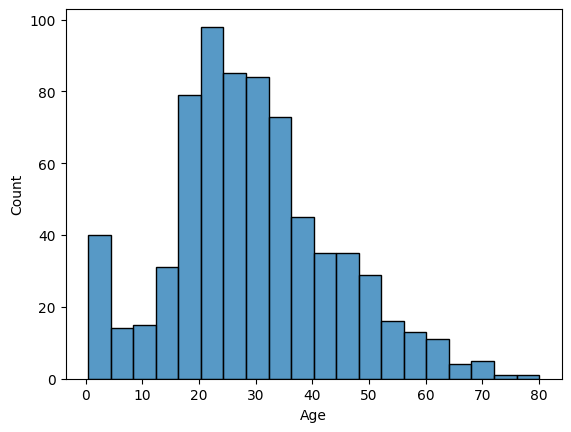

In [50]:
sns.histplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

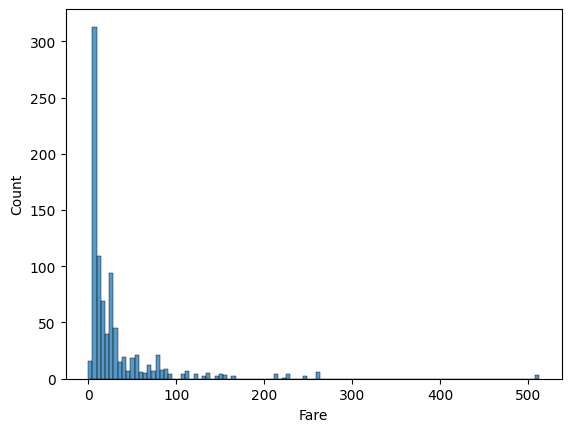

In [51]:
sns.histplot(train['Fare'])

<h1>PClass vs Survived</h1>

<Axes: xlabel='Survived', ylabel='Pclass'>

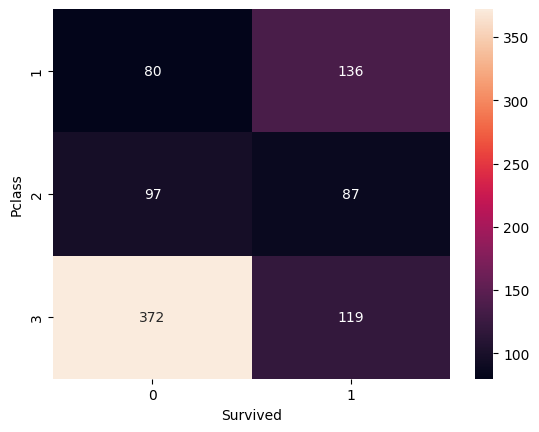

In [13]:
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

The chances of survival are higher for Class 1 passengers as compared to those in Classes 2 and 3, indicating that the passenger's Pclass is a significant factor in determining their survival rate.

<h3>Bar Plot for Fare <h3>

<Axes: xlabel='Fare_Range', ylabel='Survived'>

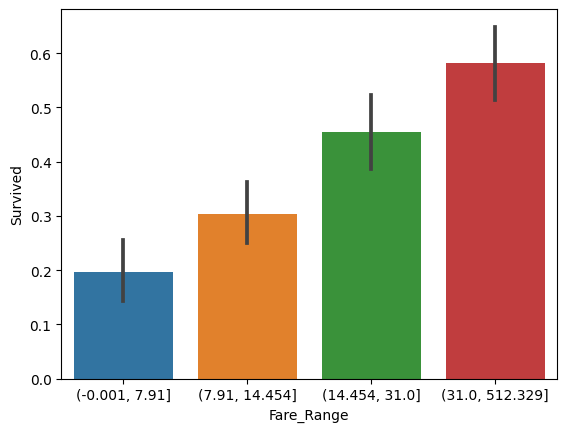

In [ ]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',
data = train)

The "Fare" column indicates the amount paid by each passenger for their ticket.From this analysis, it can be inferred that passengers who paid a higher fare had a higher survival rate.


<h3>Categorical Count Plots for Embarked Feature <h3>

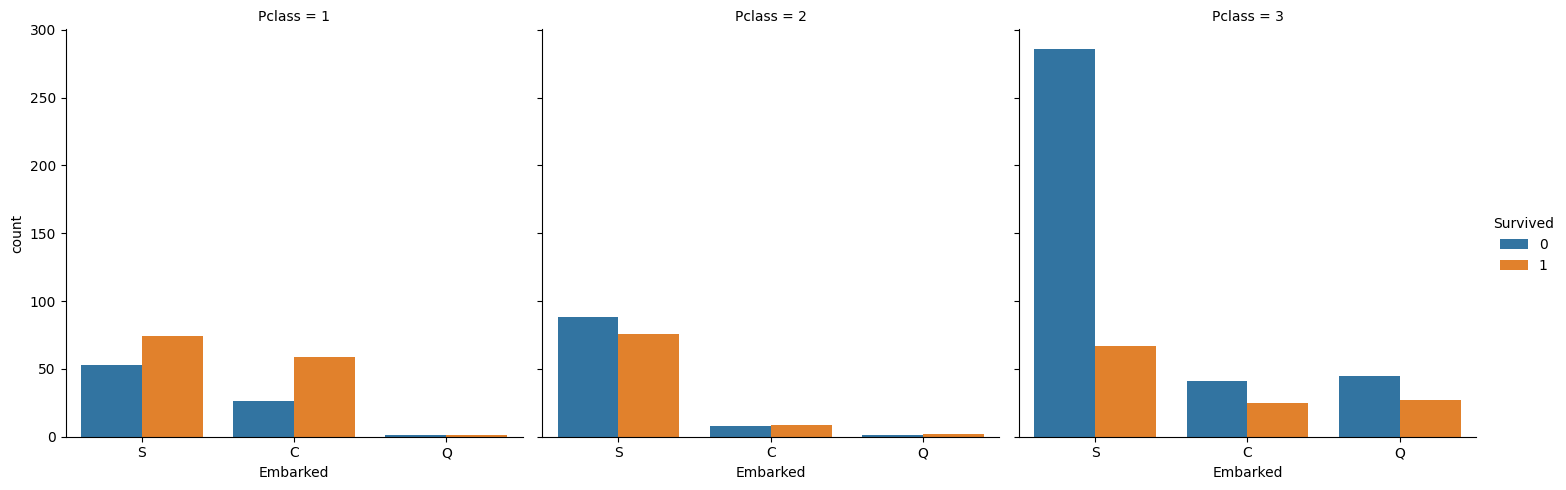

In [16]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train)

The majority of passengers boarded from S, suggesting that missing values can be imputed with S.Additionally, most Class 3 passengers boarded from Q. Notably, passengers from Class 1 and 2 who boarded from S appear to have had higher survival rates compared to those in Class 3.

<h3>Age (Continuous Feature) vs Survived<h3>  

<Axes: xlabel='Sex', ylabel='Age'>

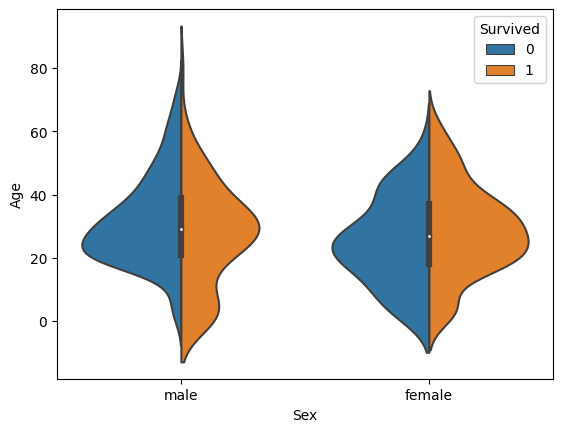

In [20]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

This graph provides a summary of the age distribution of the survivors based on gender and age group. The survival rate was:
-Good for children
-High for women between the ages of 20 and 50
-Lower for men as their age increased.
Since Age column is important, the missing values need to be filled.

In [16]:
train1 =train.fillna(value=0)

In [17]:
train1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


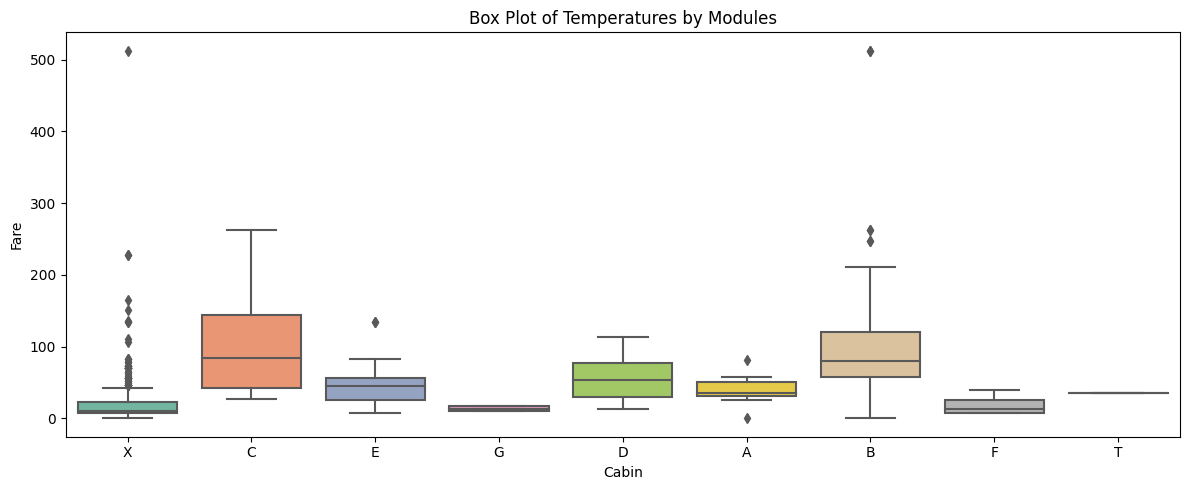

In [19]:
train['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train['Cabin']])
plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train, palette='Set2')
plt.tight_layout()

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.1513406779661
Mean Fare of Cabin D 57.24457575757575
Mean Fare of Cabin E 46.02669375


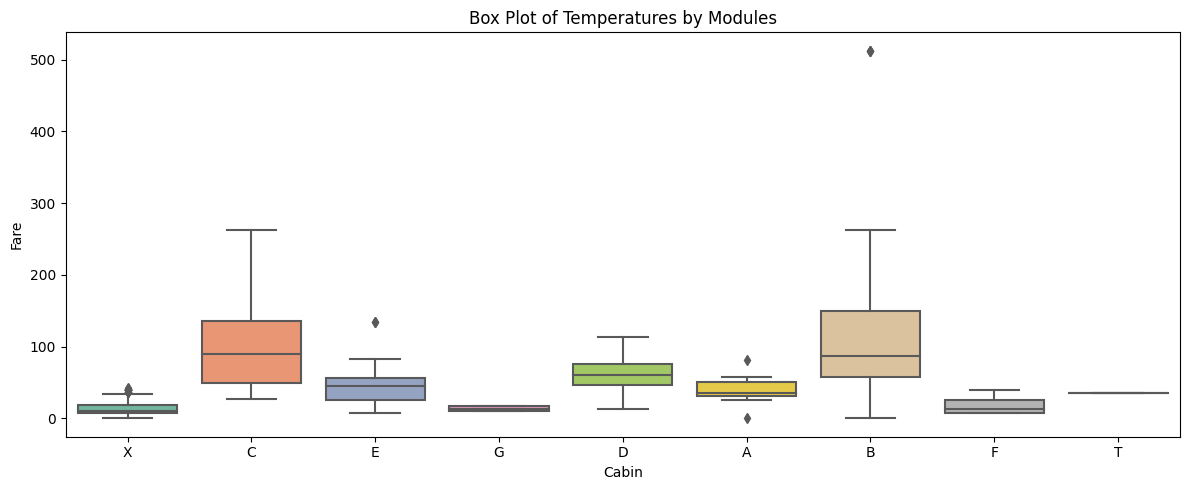

In [20]:
print('Mean Fare of Cabin B {}'.format(train[train['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(train[train['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(train[train['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(train[train['Cabin']=='E']['Fare'].mean()))

def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin
      
train['Cabin'] = train[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)


plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train, palette='Set2')
plt.tight_layout()

The columns that can be dropped are: 
PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 

In [28]:
train = train.drop(['Name','Ticket','PassengerId'], axis=1)

train.head()

KeyError: "['Name', 'Ticket', 'PassengerId'] not found in axis"

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,NaN,22.0,1,0,7.2500,8,1
1,1,1,NaN,38.0,1,0,71.2833,2,2
2,1,3,NaN,26.0,0,0,7.9250,8,1
3,1,1,NaN,35.0,1,0,53.1000,2,1
4,0,3,NaN,35.0,0,0,8.0500,8,1


Lets define 1 for female and 0 for males, to have a positive correlation since most of the survivals were females.